 En esta notebook analizaremos una base de datos que contiene información de accidentes de transito en la cuidad de Queenslans-Australia. A medida que avancemos iremos aplicando metodos para poder sacar conclusiones y resultados de nuestro database.**

In [1]:
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

A continuación cargamos nuestro database de forma local:

In [ ]:
from google.colab import files

uploaded = files.upload()

Consultamos que tipo de base de dato tenemos:

In [3]:
type(uploaded)

dict

Levantamos nuestra base de datos como un dataframe:

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['crash_data_queensland_1_crash_locations.csv']),sep=",")
df1 = pd.read_csv(io.BytesIO(uploaded['crash_data_queensland_1_crash_locations.csv']),sep=",")
df1.head()

,Crash_Ref_Number,Crash_Severity,Crash_Year,Crash_Month,Crash_Day_Of_Week,Crash_Hour,Crash_Nature,Crash_Type,Crash_Longitude,Crash_Latitude,...,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_Total,Count_Unit_Car,Count_Unit_Motorcycle_Moped,Count_Unit_Truck,Count_Unit_Bus,Count_Unit_Bicycle,Count_Unit_Pedestrian,Count_Unit_Other
0,1,Hospitalisation,2001,January,Monday,6,Head-on,Multi-Vehicle,153.052207,-27.586358,...,0,0,1,1,0,0,0,1,0,0
1,2,Property damage only,2001,January,Wednesday,9,Angle,Multi-Vehicle,153.064920,-27.595907,...,0,0,0,2,0,0,0,0,0,0
2,3,Minor injury,2001,January,Thursday,8,Rear-end,Multi-Vehicle,153.058444,-27.599409,...,0,1,1,2,0,0,0,0,0,0
3,4,Property damage only,2001,January,Sunday,8,Hit object,Single Vehicle,153.081083,-27.598882,...,0,0,0,1,0,0,0,0,0,0
4,5,Property damage only,2001,January,Tuesday,16,Overturned,Single Vehicle,0.000009,-0.000010,...,0,0,0,1,0,0,0,0,0,0


Consultamos la cantidad de filas y columnas que contiene el dataframe:

In [5]:
df1.shape
print('El df tiene {} instancias y {} features'.format(df1.shape[0],df1.shape[1]))

El df tiene 367230 instancias y 52 features


Visualizamos el nombre de cada columna:

In [6]:
df1.columns

Index(['Crash_Ref_Number', 'Crash_Severity', 'Crash_Year', 'Crash_Month',
       'Crash_Day_Of_Week', 'Crash_Hour', 'Crash_Nature', 'Crash_Type',
       'Crash_Longitude', 'Crash_Latitude', 'Crash_Street',
       'Crash_Street_Intersecting', 'State_Road_Name', 'Loc_Suburb',
       'Loc_Local_Government_Area', 'Loc_Post_Code', 'Loc_Police_Division',
       'Loc_Police_District', 'Loc_Police_Region',
       'Loc_Queensland_Transport_Region', 'Loc_Main_Roads_Region',
       'Loc_ABS_Statistical_Area_2', 'Loc_ABS_Statistical_Area_3',
       'Loc_ABS_Statistical_Area_4', 'Loc_ABS_Remoteness',
       'Loc_State_Electorate', 'Loc_Federal_Electorate',
       'Crash_Controlling_Authority', 'Crash_Roadway_Feature',
       'Crash_Traffic_Control', 'Crash_Speed_Limit',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Crash_DCA_Code', 'Crash_DCA_Description',
       'Crash_DCA_Group_De

Consulto que tipo de dato es cada variable (columna)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367230 entries, 0 to 367229
Data columns (total 52 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Crash_Ref_Number                 367230 non-null  int64  
 1   Crash_Severity                   367230 non-null  object 
 2   Crash_Year                       367230 non-null  int64  
 3   Crash_Month                      367230 non-null  object 
 4   Crash_Day_Of_Week                367230 non-null  object 
 5   Crash_Hour                       367230 non-null  int64  
 6   Crash_Nature                     367230 non-null  object 
 7   Crash_Type                       367230 non-null  object 
 8   Crash_Longitude                  367230 non-null  float64
 9   Crash_Latitude                   367230 non-null  float64
 10  Crash_Street                     367215 non-null  object 
 11  Crash_Street_Intersecting        159264 non-null  object 
 12  St

Vemos si hay datos nulo en el dataframe: como veremos no hay muchos datos nulos en las variables de tipo numerica, por ende no realizaremos un relleno de datos.

In [8]:
df1.isnull().sum()

Crash_Ref_Number                        0
Crash_Severity                          0
Crash_Year                              0
Crash_Month                             0
Crash_Day_Of_Week                       0
Crash_Hour                              0
Crash_Nature                            0
Crash_Type                              0
Crash_Longitude                         0
Crash_Latitude                          0
Crash_Street                           15
Crash_Street_Intersecting          207966
State_Road_Name                    197558
Loc_Suburb                              0
Loc_Local_Government_Area               0
Loc_Post_Code                           0
Loc_Police_Division                     0
Loc_Police_District                     0
Loc_Police_Region                       0
Loc_Queensland_Transport_Region         0
Loc_Main_Roads_Region                   0
Loc_ABS_Statistical_Area_2              0
Loc_ABS_Statistical_Area_3              0
Loc_ABS_Statistical_Area_4        

Realizaremos un analisis Univariado de ciertas columnas con las medidas de tendencia central, asi conoceremos la información de nuestro data set.
Pero primero realizaremos un garfico para saber en que año hubo mayor cantidad de accidentes:

<Axes: title={'center': 'Crash_Year'}, ylabel='Frecuencia'>

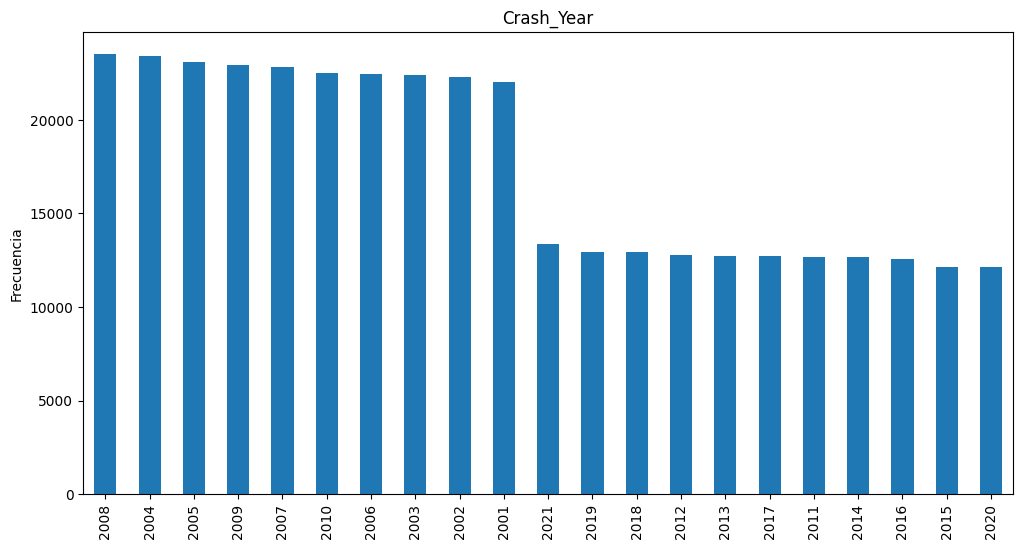

In [9]:
df1['Crash_Year'].value_counts().iloc[0:50].plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Crash_Year')

Como podemos ver el grafico anterior nos muestra que en el año 2008 hubo la mayor cantidad de acciddentes de transito y tambien nos dice que en el año 2020 fue la menor cantidad de accidentes que hubo, esto seguro se debe a que en dicho año a causa de la pandemis Covid 19 se aplicaron restricciones y no hubo mucho transito en las calles.

Calculamos las medidas de tendencia central de Crah_Year:

In [20]:
df1['Crash_Year'].mean()  #nos dice que el promedio de los años es 2008

2009.5173733082809

In [21]:
df1['Crash_Year'].median()   # me dice que la mitad de los accidentes se encuentra por debajo del año 2009 y la otra mitad por encima

2009.0

In [22]:
df1['Crash_Year'].mode()   #aqui podemos ver que la mayor cantidad de accidentes ocurrieron en 2008

0    2008
Name: Crash_Year, dtype: int64

El año año en que mas accidentes hubo fue en 2008, por ende analizaremos solo ese año creando un dataframe de 2008:

In [27]:
año_2008 = df1 ['Crash_Year'].isin([2008])
df_2008 = df1[año_2008]
df_2008

,Crash_Ref_Number,Crash_Severity,Crash_Year,Crash_Month,Crash_Day_Of_Week,Crash_Hour,Crash_Nature,Crash_Type,Crash_Longitude,Crash_Latitude,...,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_Total,Count_Unit_Car,Count_Unit_Motorcycle_Moped,Count_Unit_Truck,Count_Unit_Bus,Count_Unit_Bicycle,Count_Unit_Pedestrian,Count_Unit_Other
1490,1491,Hospitalisation,2008,January,Wednesday,22,Angle,Multi-Vehicle,153.064929,-27.590160,...,0,0,2,2,0,0,0,0,0,0
1491,1492,Medical treatment,2008,January,Friday,6,Fall from vehicle,Single Vehicle,153.008196,-27.556903,...,1,0,1,0,1,0,0,0,0,0
1492,1493,Medical treatment,2008,January,Friday,10,Rear-end,Multi-Vehicle,153.036233,-27.596029,...,1,0,1,1,0,1,0,0,0,0
1493,1494,Property damage only,2008,January,Friday,14,Rear-end,Multi-Vehicle,153.058682,-27.599513,...,0,0,0,2,0,0,0,0,0,0
1494,1495,Medical treatment,2008,January,Saturday,9,Angle,Multi-Vehicle,153.026178,-27.573042,...,1,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362210,362211,Hospitalisation,2008,October,Friday,13,Hit object,Single Vehicle,151.941934,-24.623087,...,0,0,1,0,1,0,0,0,0,0
362211,362212,Hospitalisation,2008,October,Saturday,12,Fall from vehicle,Single Vehicle,151.862408,-24.517994,...,0,0,1,0,1,0,0,0,0,0
362212,362213,Property damage only,2008,October,Thursday,17,Hit object,Single Vehicle,151.624280,-24.358076,...,0,0,0,1,0,0,0,0,0,0
362213,362214,Property damage only,2008,October,Thursday,4,Hit object,Single Vehicle,151.932766,-24.623773,...,0,0,0,1,0,0,0,0,0,0


Ahora realizamos un grafico de barra para saber que dia de la semana hubieron mas accidentes en 2008: y como resultado es el dia Viernes.

<Axes: title={'center': 'Crash_Day_Of_Week'}, ylabel='Frecuencia'>

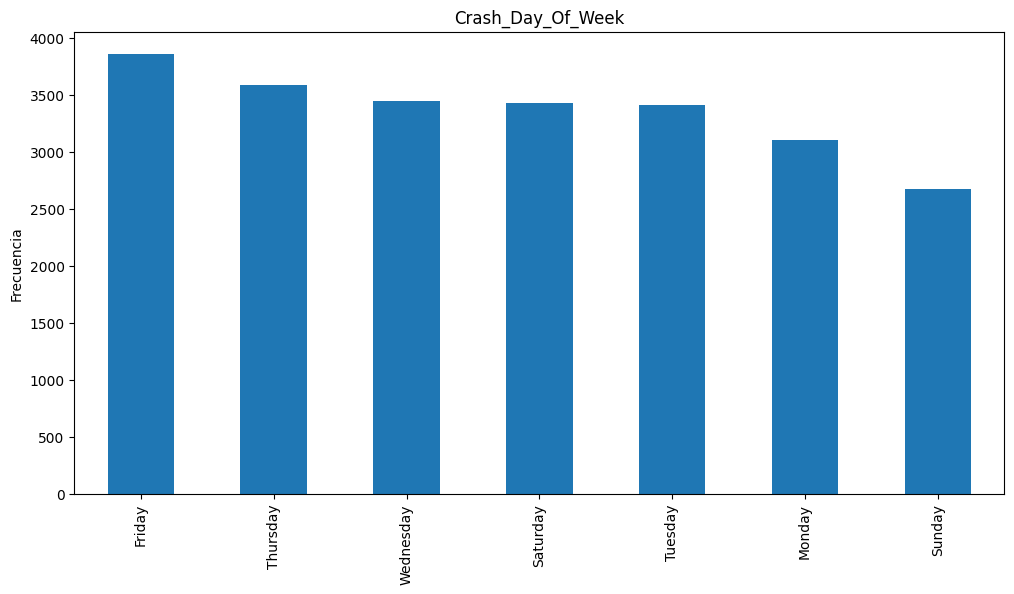

In [29]:
df_2008['Crash_Day_Of_Week'].value_counts().iloc[0:50].plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Crash_Day_Of_Week')


Con siguiente grafico podemos ver que la mayor cantidad de accidentes ocurrieron entre las 14 y 17 hrs.

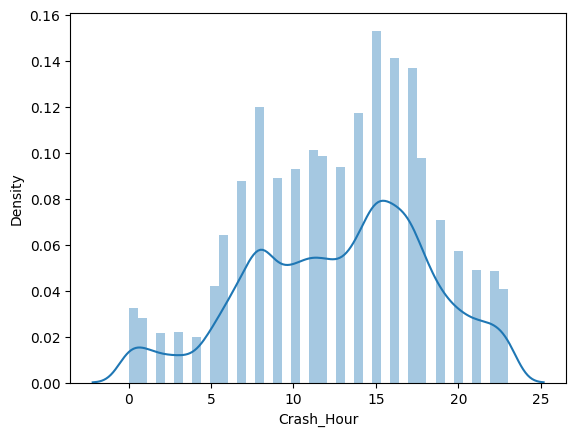

In [30]:
sns.distplot(df_2008['Crash_Hour'], kde=True) #False: para que no se traze la linea continua
plt.show()

Ahora realizaremos un analisis bibariano para poder visualizar mas de una variable, seguimos con mnuestro dataset de 2008.

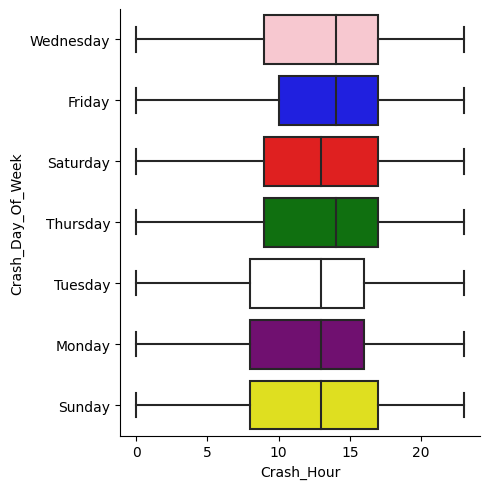

In [35]:
sns.catplot(x ="Crash_Hour",y ="Crash_Day_Of_Week", data = df_2008, kind ="box",palette={"Friday":"blue","Monday":"purple",
                                                                                     "Saturday":"red","Sunday":"yellow","Wednesday":"pink","Thursday":"green","Tuesday":"white"})

In [36]:
import plotly.express as px

fig = px.box(df_2008, x="Crash_Day_Of_Week", y="Crash_Hour")
fig.show()

Con los graficos de boxplot podemos ver que no tenemos datos atipicos, y que la mayor cantidad de accidentes en 2008 se centran entre las 9 a 17 hrs. En ese intervalo de tiempo se pueden tomar medidas de transito para que disminuyan los accidentes, por ejemplo: control de alcholemia, dirijir el transito en zonas conflitivas, colocar controles de velocidad, y fotografiar en los semaforos las infracciones cometidas para asi multar a los conductores.

Realizamos un descripción general de las columnas de la base de datos:

In [13]:
df1.describe()

,Crash_Ref_Number,Crash_Year,Crash_Hour,Crash_Longitude,Crash_Latitude,Crash_DCA_Code,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_Total,Count_Unit_Car,Count_Unit_Motorcycle_Moped,Count_Unit_Truck,Count_Unit_Bus,Count_Unit_Bicycle,Count_Unit_Pedestrian,Count_Unit_Other
count,367230.000000,367230.000000,367230.000000,367230.000000,367230.000000,367146.000000,367230.000000,367230.000000,367230.000000,367230.000000,367230.000000,367230.000000,367230.000000,367230.000000,367230.000000,367230.000000,367230.000000,367230.000000
mean,183615.500000,2009.517373,12.802726,151.488255,-25.772225,393.829803,0.016349,0.368736,0.414898,0.216875,1.016859,1.558696,0.091714,0.076399,0.017436,0.046371,0.044013,0.023920
std,106010.314015,5.902409,5.290238,6.638351,3.401877,253.879362,0.140855,0.645290,0.671735,0.510075,0.869219,0.823383,0.295751,0.280941,0.132543,0.218581,0.217559,0.155397
min,1.000000,2001.000000,0.000000,0.000009,-29.145815,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91808.250000,2005.000000,9.000000,151.933278,-27.597350,202.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,183615.500000,2009.000000,13.000000,152.986475,-27.432637,302.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,275422.750000,2014.000000,17.000000,153.085977,-25.541607,702.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,367230.000000,2021.000000,23.000000,153.550268,-0.000010,907.000000,5.000000,22.000000,29.000000,17.000000,32.000000,15.000000,5.000000,4.000000,3.000000,11.000000,20.000000,4.000000
